## Evaluation metrics

### Most common metrics used in classification problem
* Accuracy
* Precision(P)
* Recall(R)
* F1 score(F1)
* Area under the ROC (Receiver Operating Characteristic) curve or simply AUC
* Log loss
* Precision at k(P@k)
* Average precision at k(AP@k)
* Mean average precision at k(MAP@k)

### Most commom metrics used in regression problem
* Mean Absolute error(MAE)
* Mean squard error(MSE)
* Root mean squared error(RMSE)
* Root mean squared logarithmic error(RMSLE)
* Mean parcentage error(MPE)
* Mean absolute percentage error(MAPE)
* R^2

## Accuracy

In [3]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :parm y_true: list of true values
    :parm y_pred: list of predicted values
    :return: accuracy score
    """
    # Initialize a simple counter for correct predictions
    correct_counter = 0
    
    # Loop over all the elements of y_true and y_pred together
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    
    # return accuracy which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [4]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [5]:
accuracy(l1,l2)

0.625

In [6]:
# Also we can calculate accuracy using scikit-learn
from sklearn import metrics
metrics.accuracy_score(l1, l2)

0.625

## True positive, True negative, False positive, False negative

* If the model correctly predicts positive class, it is true positive, and if your model correctly predicts negative class, it is true negative.
* If the model incorrectly predicts positive class, it is false positive, and if your model incorrectly predicts negative class, it is false negative.

### True positive

In [13]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positive
    :Param y_true: list of true values
    :Param y_pred: list of predicted values
    :return: number of true positive
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

### True negative

In [14]:
def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

### False positive

In [15]:
def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

### False negative

In [16]:
def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [17]:
# Checking the function
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [18]:
true_positive(l1,l2)

2

In [19]:
true_negative(l1,l2)

3

In [20]:
false_positive(l1,l2)

1

In [21]:
false_negative(l1,l2)

2

### Accuracy Score Function

In [28]:
def accuracy_score(y_true, y_pred):
    accuracy = (true_positive(y_true, y_pred) + true_negative(y_true, y_pred)) / (true_positive(y_true, y_pred) + true_negative(y_true, y_pred) + false_positive(y_true, y_pred) + false_negative(y_true, y_pred))
        
    return accuracy

In [29]:
accuracy_score(l1,l2)

0.625

In [32]:
def accuracy_score_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    # Formula for finding accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy


In [33]:
accuracy_score_v2(l1,l2)

0.625

In [34]:
# Using scikit-learn
from sklearn import metrics
metrics.accuracy_score(l1,l2)

0.625

### Precision

* precision = TP / (TP + FP)

In [35]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    # Formula of precision
    precision = tp / (tp + fp)
    return precision

In [36]:
precision(l1,l2)

0.6666666666666666

###  Recall
* Recall = TP / (TP + FN)

In [37]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    # Formula of recall
    recall = tp / (tp + fn)
    return recall

In [38]:
recall(l1,l2)

0.5

### Precision-recall ploting

In [39]:
y_true = [0, 0, 0, 1,0,0,0,0, 0, 0,1, 0, 0,0,0,0,0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937,  0.0191491,  0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,   0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

    

In [40]:
precisions = []
recalls =[]

# Assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377, 
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# For every threshold, calculate predictions in binary
# and append calculated precisions and recall to their respective lists
for i in thresholds:
    temp_thresholds = [1 if x>=i else 0 for x in y_pred]
    p = precision(y_true, temp_thresholds)
    r = recall(y_true, temp_thresholds)
    
    # append the values
    precisions.append(p)
    recalls.append(r)
    


Text(0, 0.5, 'Precision')

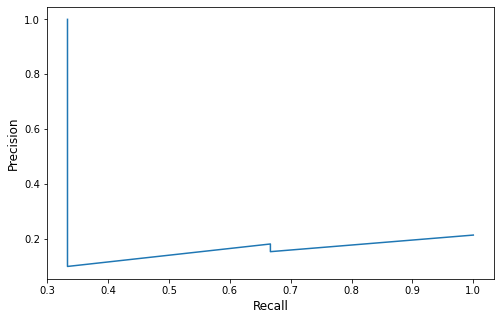

In [48]:
# Ploting the precision and recall values
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)

## F1 score

In [49]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    # Formula for finding f1 score
    f1_score = 2 * p * r / (p + r)
    return f1_score

In [51]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [52]:
f1(y_true, y_pred)

0.5714285714285715

In [53]:
# Finding f1 score using scikit learn
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

## Area Under Curve (AUC)
* AUC is widely used for skewed binary classification tasks

### True positive rate / recall
* TPR = TP / (TP + FN)

In [61]:
#### True positive rate or recall is known as sensitivity.
def tpr(t_true, t_pred):
    recall1 = recall(t_true, t_pred)
    return recall1

### False Positive Rate
* FPR = FP / (FP + TN)

In [57]:
# FPR is known as specificity or True Negative Rate or TNR
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (fp + tn)

In [62]:
# lists to store tpr and fpr
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
            0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for i in thresholds:
    # calculate predictions for a given thresholds
    temp_pred = [1 if x >= i else 0 for x in y_pred]
    # calculate true positive rate
    temp_tpr = tpr(y_true, temp_pred)
    # calculate false positive rate
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [64]:
import pandas as pd
data = {'Threshold': thresholds, 'tpr': tpr_list, 'fpr': fpr_list}
pd.DataFrame(data)

,Threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


### ROC curve
* Most of the time, the top-left value on ROC curve should give you a quite good threshold, as shown in figure.
* Comparing the table and the ROC curve, we see that a threshold of around 0.6 is quite good where we do not lose a lot of true positives and neither we have a lot of false positives.

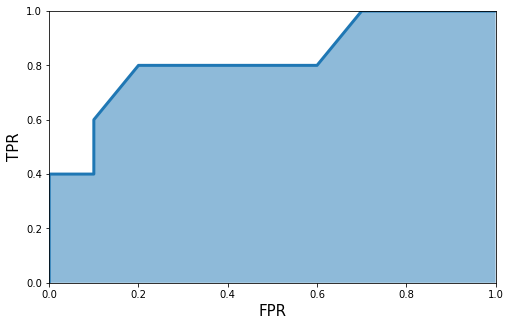

In [67]:
# True positive rate and False positive rate or ROC curve
plt.figure(figsize=(8,5))
plt.fill_between(fpr_list, tpr_list, alpha=0.5)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [68]:
# Using scikit-learn find auc score
from sklearn import metrics
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

### Log Loss
* Log Loss = -1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction))
* Log Loss penalizes quite high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very sure and very wrong.

In [72]:
import numpy as np
def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: lsit of probabilities for 1
    :return: overall log loss
    """
    # Define an epsilon value. This can also be an input.
    # This value is used to clip probabilisties
    epsilon = 1e-15
    # Initialize empty list to store indivisual losses
    loss = []
    # Loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        yp = np.clip(yp, epsilon, 1-epsilon)
        # calculate loss for one sample
        temp_loss = -1.0 * (yt * np.log(yp) + (1-yt) * np.log(1 - yp))
        # add to loss list
        loss.append(temp_loss)
        
    # return mean loss over all samples
    return np.mean(loss)

In [73]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
            0.85, 0.15, 0.99]

In [74]:
log_loss(y_true, y_proba)

0.49882711861432294

In [75]:
# Finding log loss using scikit-learn
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

## Calculate precision and recall for multi-class classification

There are three different ways to calculate this which might get confusing from time to time. Let’s assume we are interested in precision first. We know that precision depends on true positives and false positives.
- Macro averaged precision: calculate precision for all classes individually and then average them
- Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
- Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class

In [81]:
# Macro averaged precision 
import numpy as np
def macro_precision(y_true, y_pred):
    num_class = len(np.unique(y_true))
    precision = 0
    for class_ in range(num_class):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # calculate precision
        temp_precision = tp / (tp + fp)
        # keep adding precision for all classes
        precision += temp_precision
    # calculate and return average precision over all classes
    precision /= num_class
    return precision

In [77]:
# Micro Averaged Precision
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    tp = 0
    fp = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # Calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [86]:
# Weighted precision
from collections import Counter

def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    # Create class: sample count dictionary. Looks like
    # {0: 20, 1: 15, 2: 21}
    class_counts = Counter(y_true)
    
    precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp / (tp + fp)
        
        # multiply precision with count of sample in class
        weighted_precision = class_counts[class_] * temp_precision
        
        # add to overall precision
        precision += weighted_precision
        
    # Calculate overall precision by dividing by total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [79]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [82]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [83]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [87]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [88]:
# Implementation with scikit-learn
from sklearn import metrics

In [89]:
metrics.precision_score(y_true, y_pred, average='macro')

0.3611111111111111

In [90]:
metrics.precision_score(y_true, y_pred, average='micro')

0.4444444444444444

In [91]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.39814814814814814

### Weighted F1 Score

In [98]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    f1 = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else: 
            temp_f1 = 0
            
        # multiply f1 with count of samples in class
        weighted_f1 =  class_counts[class_] * temp_f1 
        
        # add to f1 precision
        f1 += weighted_f1
        
        # Calculate overall F1 by dividing by total number of samples
        overall_f1 = f1 / len(y_true)
        return overall_f1
    

In [99]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [100]:
weighted_f1(y_true, y_pred)

0.2857142857142857

In [97]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.41269841269841273

## Confusion matrix
* Confusion matrix is a table of TP, FP, TN, FN.
* If we have N classes, then it will be a matrix of size NxN

Text(25.5, 0.5, 'Predicted Labels')

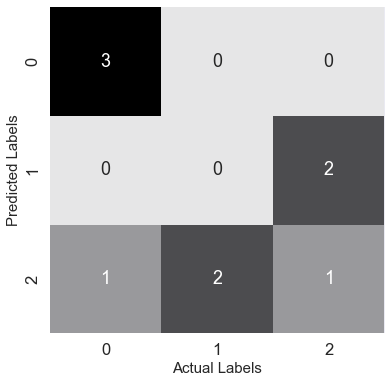

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

# ploting using matplotlib and seaborn
plt.figure(figsize=(6, 6))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.xlabel('Actual Labels', fontsize=15)
plt.ylabel('Predicted Labels', fontsize=15)

## Multi-label classification
* Precision at k(P@k)
* Average precision at k(AP@k)
* Mean Average precision at k(MAP@k)
* Log Loss

### Precision at k or P@k

In [110]:
def pk(y_true, y_pred, k):
    # if k is 0, return 0, k have to be >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    # convert actual values and prediction to set
    true_set = set(y_true)
    pred_set = set(y_pred)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return lenght of common values over k
    return len(common_values) / len(y_pred[:k])

### Average precision at k or AP@k

In [111]:
def apk(y_true, y_pred, k):
    pk_values = []
    
    for i in range(1, k+1):
        pk_values.append(pk(y_true, y_pred, i))
        
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [113]:
y_true = [[1,2,3],[0,2],[1],[2,3],[1,0],[]]
y_pred = [[0,1,2],[1],[0,2,3],[2,3,4,0],[0,1,2],[0]]

for i in range(len(y_true)):
    for j in range(1,4):
        print(
            f"""
            y_true = {y_true[i]},
            y_pred = {y_pred[i]},
            AP@{j} = {apk(y_true[i], y_pred[i], k=j)}
            """
        )


            y_true = [1, 2, 3],
            y_pred = [0, 1, 2],
            AP@1 = 0.0
            

            y_true = [1, 2, 3],
            y_pred = [0, 1, 2],
            AP@2 = 0.25
            

            y_true = [1, 2, 3],
            y_pred = [0, 1, 2],
            AP@3 = 0.38888888888888884
            

            y_true = [0, 2],
            y_pred = [1],
            AP@1 = 0.0
            

            y_true = [0, 2],
            y_pred = [1],
            AP@2 = 0.0
            

            y_true = [0, 2],
            y_pred = [1],
            AP@3 = 0.0
            

            y_true = [1],
            y_pred = [0, 2, 3],
            AP@1 = 0.0
            

            y_true = [1],
            y_pred = [0, 2, 3],
            AP@2 = 0.0
            

            y_true = [1],
            y_pred = [0, 2, 3],
            AP@3 = 0.0
            

            y_true = [2, 3],
            y_pred = [2, 3, 4, 0],
            AP@1 = 1.0
            

            y_tru

### Mean average precision at k or MAP@k

In [120]:
def mapk(y_true, y_pred, k):
    apk_values = []
    for i in range(len(y_true)):
        # Store apk values for ever sample
        apk_values.append(apk(y_true[i], y_pred[i], k=k))
    
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [121]:
y_true = [[1,2,3],[0,2],[1],[2,3],[1,0],[]]
y_pred = [[0,1,2],[1],[0,2,3],[2,3,4,0],[0,1,2],[0]]

mapk(y_true, y_pred, k=1)

0.3333333333333333

In [122]:
mapk(y_true, y_pred, k=2)

0.375

In [123]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [124]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

## Metrices in Regression
### Mean absolute error(MAE)
* Absolute Error = Abs(True Value - Predicted Value)

In [125]:
import numpy as np
def mean_absolute_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

## Mean squared error(MSE)
* Squared error = (True Value - Predicted Value)^2
* Mean of Squared error

In [126]:
def mean_squared_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - kp) ** 2
        
    return error / len(y_true)

### Root mean squared error
* RMSE = SQRT(MSE)

In [128]:
def root_mean_squared_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.sqrt((yt - kp) ** 2)
        
    return error / len(y_true)

### Mean squared logarithmic error

In [129]:
def mean_squared_logarithmic_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
        
    return error / len(y_true)

### Root mean squared logarithmic error

In [130]:
def root_mean_squared_logarithmic_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.sqrt((np.log(1 + yt) - np.log(1 + yp)) ** 2)
        
    return error / len(y_true)

### Mean percentage error
* Percentage error = ((True value - Predicted value) / True value) * 100

### R-squared error

In [131]:
def r2(y_true, y_pred):
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    numerator = 0
    denominator = 0
    
    for yt, tp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2
    
    # calculate the ratio
    ratio = numerator / denominator
    return 1 - ratio
    

### Using numpy finding mean absolute error
* It is faster

In [133]:
import numpy as np
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### Quadratic weighted kappa
* Advanced metrics: also known as QWK. It is also known as Cohen’s kappa. QWK measures the “agreement” between two “ratings”. The ratings can be any real numbers in 0 to N. And predictions are also in the same range. An agreement can be defined as how close these ratings are to each other. So, it’s suitable for a classification problem with N different categories/classes.
* If the agreement is high, the score is closer towards 1.0. In the case of low agreement, the score is close to 0.

In [134]:
from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

metrics.cohen_kappa_score(y_true, y_pred, weights='quadratic')

0.33333333333333337

In [135]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

- Note: Accuracy is high, QWK is less. A QWK greater than 0.85 is considered to be very good.

### Matthew's Correlation Coefficient(MCC)
* MCC ranges from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random prediction.
                    TP * TN - FP * FN
MCC = ─────────────────────────────────────
          [ (TP + FP) * (FN + TN) * (FP + TN) * (TP + FN) ] ^ (0.5)

In [137]:
def mcc(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp * fn) * (tn + fn) * (tn + fp)) ** .5
    
    return numerator / denominator